#Importing the data
---

In [ ]:
import pandas as pd


nutrition_subset  = pd.read_csv("https://raw.githubusercontent.com/J-Salt/IDS/main/HW4/nutrition_subset.csv");

nutrition_subset

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


#Printing the top 5 foods with the highest saturated fat
---

In [ ]:
nutrition_subset.sort_values(by=['saturated_fat'], ascending=False).iloc[0:5,:]


,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


#Creating fat/gram column and printing the top five from this category
---

In [ ]:
nutrition_subset['saturated_fat_per_gram'] = nutrition_subset['saturated_fat'] / nutrition_subset['weight_in_grams']
nutrition_subset

nutrition_subset.sort_values(by=['saturated_fat_per_gram'], ascending=False).iloc[0:5,:]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


#Scaling the saturated fat per gram and creating density plots
---
Used to identify outliers


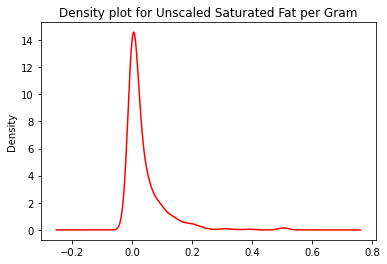

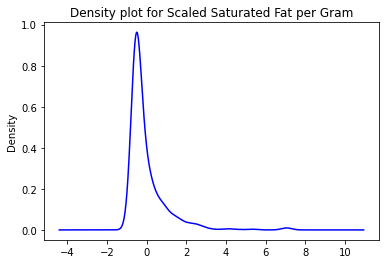

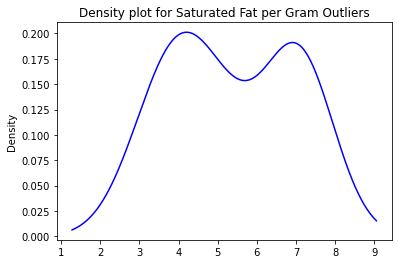

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_sat_fat_per_gram
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460,4.240676
448,COCONUT; RAW; SHREDDED 1 CUP,80.00,23.8,0,0.297500,3.938687
492,COCONUT; DRIED; SWEETND;SHREDD1 CUP,93.00,29.3,0,0.315054,4.204266
576,COCONUT; RAW; PIECE 1 PIECE,45.00,13.4,0,0.297778,3.942889
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
890,LARD 1 CUP,205.00,80.4,195,0.392195,5.371375
898,FATS; COOKING/VEGETBL SHORTENG1 TBSP,13.00,3.3,0,0.253846,3.278227
899,LARD 1 TBSP,13.00,5.1,12,0.392308,5.373078
907,FATS; COOKING/VEGETBL SHORTENG1 CUP,205.00,51.3,0,0.250244,3.223726


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt


nutrition_subset['scaled_sat_fat_per_gram'] = stats.zscore(nutrition_subset.saturated_fat_per_gram, nan_policy='omit')
nutrition_subset.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated Fat per Gram')
plt.show()

nutrition_subset.scaled_sat_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled Saturated Fat per Gram')
plt.show()


nutrition_subset_outliers = nutrition_subset.query('(scaled_sat_fat_per_gram < -3 | scaled_sat_fat_per_gram > 3)')
nutrition_subset_outliers.scaled_sat_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Saturated Fat per Gram Outliers')
plt.show()

nutrition_subset_outliers

#Scaling the rest of the numerical data and 

In [ ]:
nutrition_subset['scaled_sat_fat'] = stats.zscore(nutrition_subset.saturated_fat, nan_policy='omit')
nutrition_subset['scaled_cholesterol'] = stats.zscore(nutrition_subset.cholesterol, nan_policy='omit')
nutrition_subset['scaled_weight'] = stats.zscore(nutrition_subset.weight_in_grams, nan_policy='omit')

sat_fat_outliers = nutrition_subset.query('(scaled_sat_fat < -3 | scaled_sat_fat > 3)')
print('SATURATED FAT OUTLIERS')
print(sat_fat_outliers)
print('-----------------------------------------------------------------------------------')
cholesterol_outliers = nutrition_subset.query('(scaled_cholesterol < -3 | scaled_cholesterol > 3)')
print('CHOLESTEROL OUTLIERS')
print(cholesterol_outliers)
print('-----------------------------------------------------------------------------------')
weight_outliers = nutrition_subset.query('(scaled_weight < -3 | scaled_weight > 3)')
print('WEIGHT OUTLIERS')
print(weight_outliers)
print('-----------------------------------------------------------------------------------')


SATURATED FAT OUTLIERS
                                  food item  weight_in_grams  saturated_fat  \
376  FRUITCAKE;DARK; FROM HOMERECIP1 CAKE             1361.0           47.6   
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
384  POUND CAKE; COMMERCIAL        1 LOAF              500.0           52.0   
410  DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE             1107.0           55.6   
422  CARROT CAKE;CREMCHESE FRST;REC1 CAKE             1536.0           66.0   
423  YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE             1108.0           47.8   
430  PUMPKIN PIE                   1 PIE               910.0           38.2   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
466  ICE CREAM; VANLLA; REGULR 11% 1/2 GALN           1064.0           71.3   
479  SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE             1096.0           41.6   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
581  CREME PIE               

# Summary
---